In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from WFC import WaveFunctionCollapse
import rasterio
import seaborn as sns

from utils import visualize_3d_terrain, visualize_terrain
from functions import height_to_slopes, slopes_to_height

(500, 500)
{'driver': 'SRTMHGT', 'dtype': 'int16', 'nodata': -32768.0, 'width': 3601, 'height': 3601, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0002777777777777778, 0.0, 56.99986111111111,
       0.0, -0.0002777777777777778, 27.000138888888888), 'blockysize': 1, 'tiled': False}
/Users/parsa/Daneshgah/Arshad/Thesis/datasets/SRTM_IRAN/data/N26E057.hgt


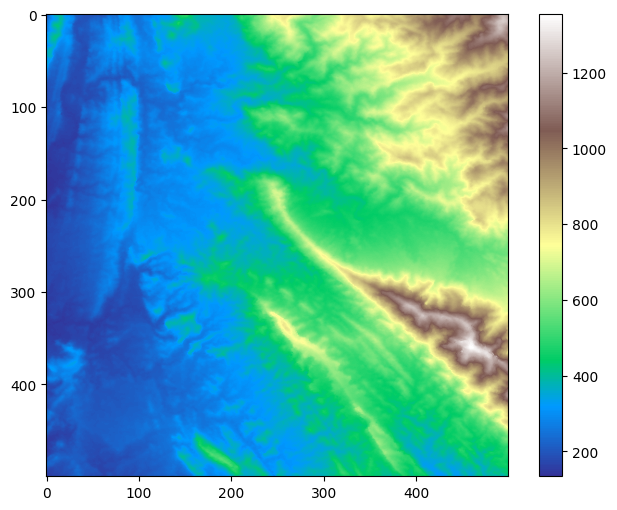

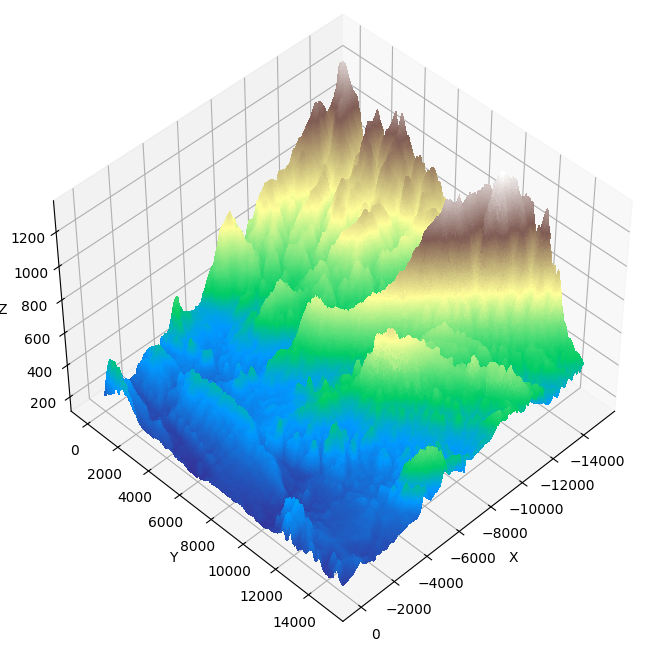

(134.0, 1354.0, 460.776732)

In [2]:
# dataset_dir = "/Users/parsa/Daneshgah/Arshad/Thesis/datasets/pappas_kaggle/archive"
# data_paths = sorted(glob.glob(os.path.join(dataset_dir, "*.png")))
# sample_data_path = data_paths[0]

# # Load the image
# sample_data = iio.imread(sample_data_path, mode='I')[400:500, 400:500]  # 'I' mode ensures reading as uint16
# print(sample_data.dtype)  # This should print 'uint16'

# # Load the image
# sample_data = cv2.imread(sample_data_path, cv2.IMREAD_UNCHANGED)
# print(sample_data.dtype)  # This should print 'uint16'

i = 15
dataset_dir = "/Users/parsa/Daneshgah/Arshad/Thesis/datasets/SRTM_IRAN/data/"
data_paths = sorted(glob.glob(os.path.join(dataset_dir, "*.hgt")))
sample_data_path = data_paths[i]

with rasterio.open(sample_data_path) as src:
    sample_data = src.read(1)[2500:3000, 1500:2000].astype(float)  # Read the first (and only) band
    profile = src.profile  # Get metadata such as CRS, transform, etc.

# sample_data = np.array([
#     [0, 1, 3, 10, 15, 9],
#     [2, 4, 3, 8, 13, 10],
#     [3, 1, 7, 7, 12, 9],
#     [4, 2, 6, 10, 13, 11],
#     [6, 1, 8, 9, 15, 7],
#     [6, 3, 2, 5, 4, 2,]]
# )
print(sample_data.shape)
print(profile)


print(sample_data_path)
visualize_terrain(sample_data)
visualize_3d_terrain(sample_data)
# sns.heatmap(sample_data, annot=True, cmap='terrain')
sample_data.min(), sample_data.max(), sample_data.mean()

In [3]:

# wfc = WaveFunctionCollapse(sample_data, pattern_size=2, grid_size=(20,20), wrap_input=False)
# output_image = wfc.run()

sample_data.shape

(500, 500)

In [4]:
grad_x, grad_y = height_to_slopes(sample_data)
grad_x.shape, grad_y.shape

((500, 499), (499, 500))

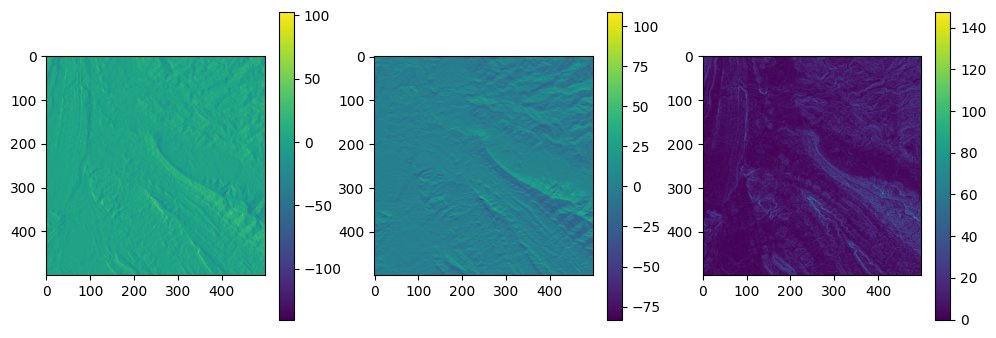

In [5]:
fix, axes = plt.subplots(1, 3, figsize=(12,4))
im1 = axes[0].imshow(grad_x)#, cmap='terrain')
im2 = axes[1].imshow(grad_y)#, cmap='terrain')
im3 = axes[2].imshow(np.sqrt(grad_x[:-1,...]**2 + grad_y[...,:-1]**2))
fix.colorbar(im1, ax=axes[0])
fix.colorbar(im2, ax=axes[1])
fix.colorbar(im3, ax=axes[2])

# im1 = sns.heatmap(grad_x, ax=axes[0], annot=True)
# im2 = sns.heatmap(grad_y, ax=axes[1], annot=True)
# im3 = sns.heatmap(sample_data, ax=axes[2], annot=True)



[-218.]
True


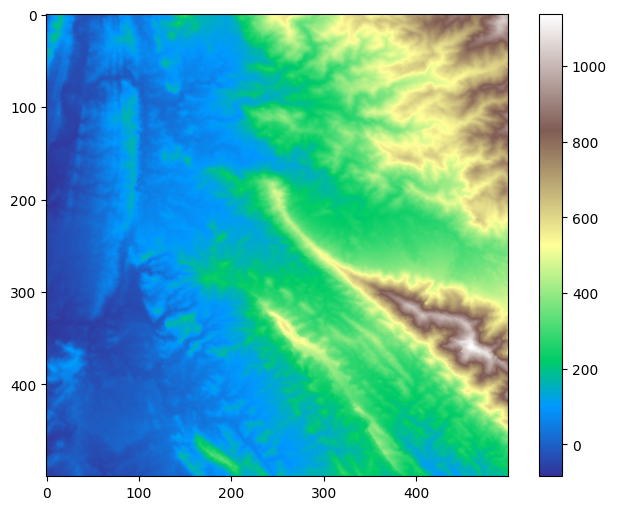

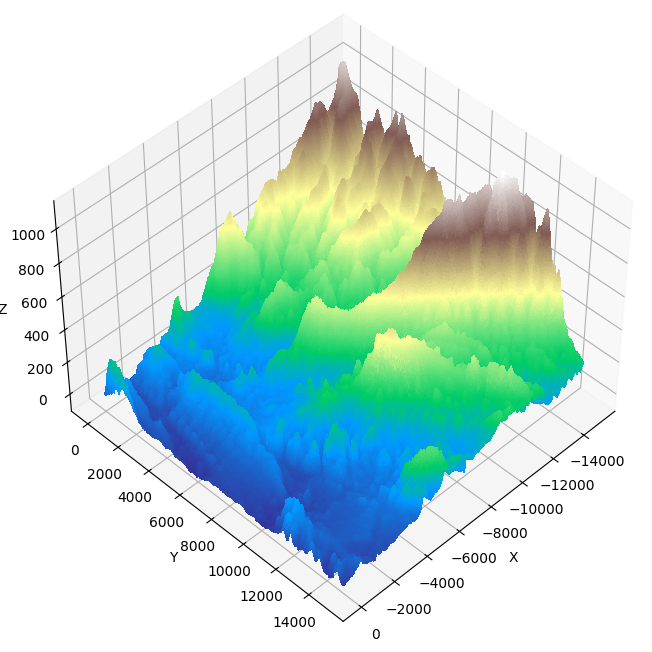

In [6]:


hh = slopes_to_height(grad_x, grad_y)
print(np.unique(hh-sample_data))
print(len(np.unique(hh-sample_data)) == 1)
# fix, axes = plt.subplots(1, 2, figsize=(8,4))
# im1 = sns.heatmap(hh, ax=axes[0], annot=True)
# im2 = sns.heatmap(sample_data2, ax=axes[1], annot=True)

visualize_terrain(hh)
visualize_3d_terrain(hh)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00,
        3.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00, 5.0000e+00,
        7.0000e+00, 2.0000e+01, 2.1000e+01, 3.2000e+01, 5.4000e+01,
        1.0300e+02, 1.1900e+02, 2.7400e+02, 5.5900e+02, 1.3760e+03,
        3.8540e+03, 1.0742e+04, 3.0015e+04, 6.3005e+04, 8.4067e+04,
        3.3308e+04, 1.3852e+04, 5.1820e+03, 1.7040e+03, 6.2800e+02,
        2.1400e+02, 1.5200e+02, 9.1000e+01, 3.3000e+01, 2.6000e+01,
        2.2000e+01, 1.0000e+01, 4.0000e+00, 3.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-140.  , -135.14, -130.28, -125.42, -120.56, -115.7 , -110.84,
        -105.98, -101.12,  -96.26,  -91.4 ,  -86.54,  -81.68,  -76.82,
         -71.96,  -67.1 ,  -62.24,  -57.38,  -52.52,  -47.66,  -42.8 ,
         -37.94,  -33.08,  -28.22,  -23.36,  -18.5 ,  -13.64,   -8.78,
          -3.92,    0.94,    5.8 ,

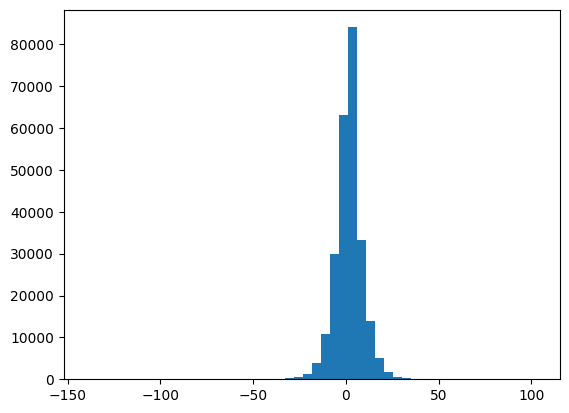

In [19]:
plt.hist(grad_x.flatten(), bins=50)

In [8]:
5 not in [5]

False

In [9]:
grad_x.shape

(500, 499)

In [10]:
np.multiply(*grad_x.shape)

249500